In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!ls "./drive/My Drive/Train_data"

cherry	strawberry  tomato


In [5]:
!pip install imutils

In [0]:
import numpy as np
import random
import cv2
from imutils import paths
import os
import pandas as pd


In [0]:
ps_up = sorted(list(paths.list_images("./drive/My Drive/Train_data")))
ps_up = [ps.replace("\\","") for ps in ps_up]

In [0]:
ones = [p.split('/')[5] for p in ps_up]
ones = pd.DataFrame(ones)
ones.to_csv("./drive/My Drive/plots/lister.csv")

In [0]:
images = []
for imagePath in ps_up:
  im = cv2.imread(imagePath)
  h, w = im.shape[:2]
  
  #flatten image
  im = im.transpose(2,0,1).reshape(3,-1)

  #brightness is simple, assign 1 if zero to avoid divide
  brg = np.amax(im,axis=0)
  brg[brg==0] = 1

  #hue, same, assign 1 if zero, not working atm due to arccos
  denom = np.sqrt((im[0]-im[1])**2-(im[0]-im[2])*(im[1]-im[2]))
  denom[denom==0] = 1

  #saturation
  sat = (brg - np.amin(im,axis=0))/brg
  
  b, s = np.mean(brg), np.mean(sat)
  images.append({'class':imagePath.split('/')[4],
                 'height':h,
                 'width':w, 
                 'brightness':b, 
                 'saturation':s})

images = pd.DataFrame(images)

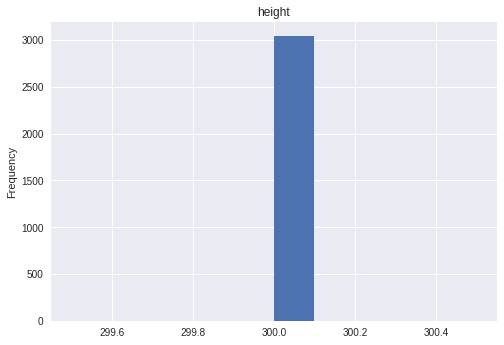

In [51]:
height = images.height.plot(kind='hist', title='height').get_figure()
height.savefig("./drive/My Drive/plots/height.png")

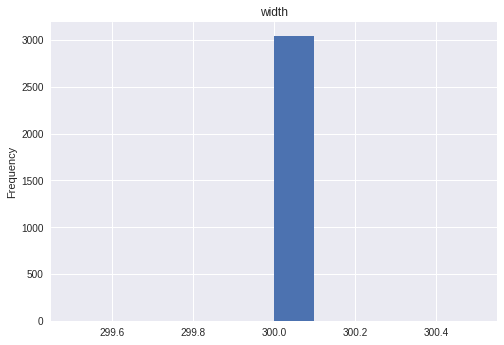

In [52]:
width = images.width.plot(kind='hist', title='width').get_figure()
width.savefig("./drive/My Drive/plots/width.png")

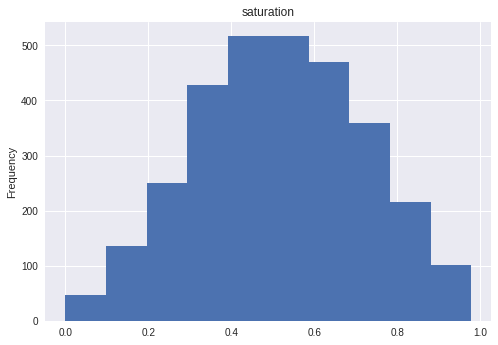

In [53]:
sat = images.saturation.plot(kind='hist', title='saturation').get_figure()
sat.savefig("./drive/My Drive/plots/sat.png")

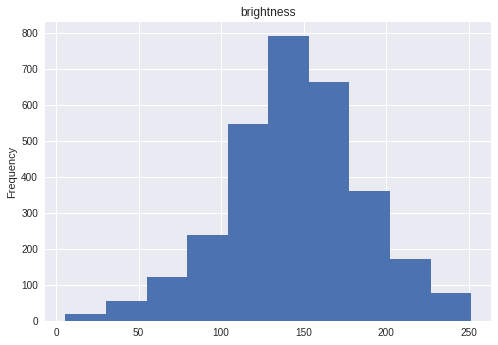

In [55]:
bright = images.brightness.plot(kind='hist', title='brightness').get_figure()
bright.savefig("./drive/My Drive/plots/bright.png")

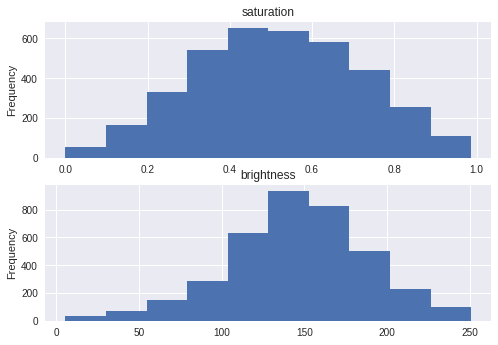

In [11]:
import matplotlib.pyplot as plt

# plt.subplot(2,2,1)
# height = images.height.plot(kind='hist', title='height').get_figure()

# plt.subplot(2,2,2)
# width = images.width.plot(kind='hist', title='width').get_figure()

plt.subplot(2,1,1)
sat = images.saturation.plot(kind='hist', title='saturation').get_figure()

plt.subplot(2,1,2)
bright = images.brightness.plot(kind='hist', title='brightness').get_figure()

plt.savefig("./drive/My Drive/plots/all_new.png")